In [1]:
from utils import reader_csv, get_exp_info, gaus_fit, edep_plot
import numpy as np
import matplotlib.pyplot as plt
import utils
from scipy.interpolate import griddata
import json
import lmfit
Energy = [1,2,5,10] # GeV
path = [f'./data/B4_randomOFF_{e}_1000.csv' for e in Energy]
nofCells = 40
num = 1000
pos = np.zeros([len(Energy),num,2])

In [2]:
for i,p in enumerate(path):
    egap, labs, lgap, lsen, eSen, eAbs = reader_csv(p)
    energys, position = get_exp_info(eSen*1e-3)
    pos[i,:,:] = position

In [3]:
def pos_gaus(pos,bins=50):
    h,bins = np.histogram(pos, bins=bins)
    x = 0.5*(bins[1:]+bins[:-1])
    mod = lmfit.models.GaussianModel()
    pars = mod.make_params(amplitude=h.max(), mean=0, stddev=1)
    out = mod.fit(h, pars, x=x)
    return out

In [4]:
result1 = []
result2 = []
for i,e in enumerate(Energy):
    out1 = pos_gaus(pos[i,:,0])
    out2 = pos_gaus(pos[i,:,1])
    result1.append(out1)
    result2.append(out2)
sigma = np.zeros([len(Energy),2])
sigma[:,0] = np.array([o.best_values['sigma'] for o in result1])
sigma[:,1] = np.array([o.best_values['sigma'] for o in result2])

In [5]:
def plot(out1, out2):
    fig, axs = plt.subplots(2, 2, figsize=(9, 5),height_ratios=[2,1])
    # out1 = pos_gaus(position[:,0],bins=20)
    out1.plot_fit(axs[0,0])
    out1.plot_residuals(axs[1,0])
    axs[0,0].set_title("x")
    axs[0,0].set_xlabel("x/mm")
    axs[0,0].set_ylabel("count")
    axs[0,0].legend(["data",f"$\\mu={out1.best_values['center']:.3f},\\sigma={out1.best_values['sigma']:.3f}$"])
    axs[1,0].set_title("")
    # out2 = pos_gaus(position[:,1],bins=20)
    out2.plot_fit(axs[0,1])
    out2.plot_residuals(axs[1,1])
    axs[0,1].set_title("y")
    axs[0,1].set_xlabel("y/mm")
    axs[0,1].set_ylabel("count")
    axs[0,1].legend(["data",f"$\\mu={out2.best_values['center']:.3f},\\sigma={out2.best_values['sigma']:.3f}$"])
    axs[1,1].set_title("")
    plt.tight_layout()

In [6]:
def scatter_plot(position):
    fig, axs = plt.subplots(2, 2, figsize=(9, 9))
    ax:plt.Axes = axs[0,0]
    ax.scatter(position[:,0], position[:,1])
    ax:plt.Axes = axs[0,1]
    ax.hist(position[:,0], bins=40)
    ax:plt.Axes = axs[1,0]
    ax.hist(position[:,1], bins=40)
    return fig

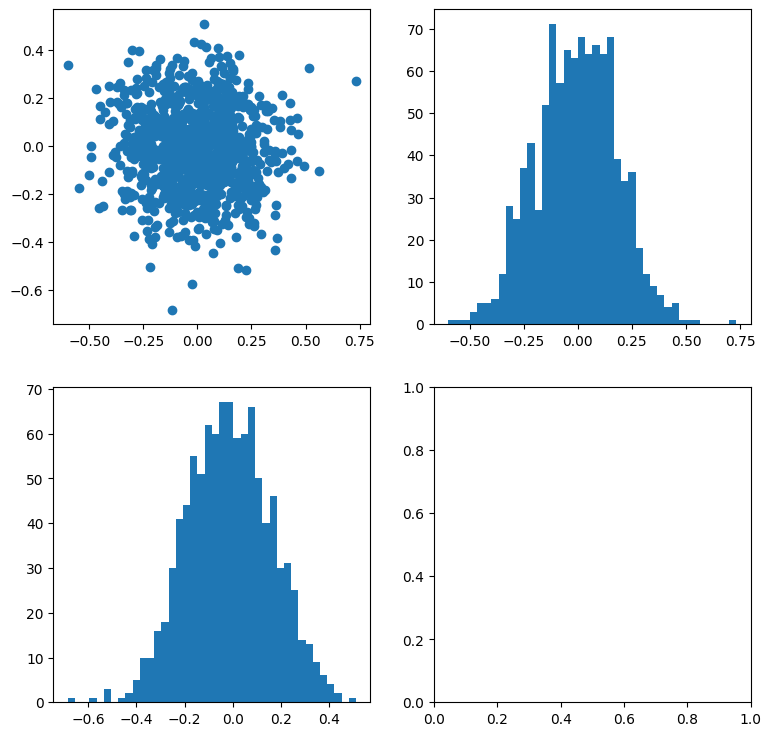

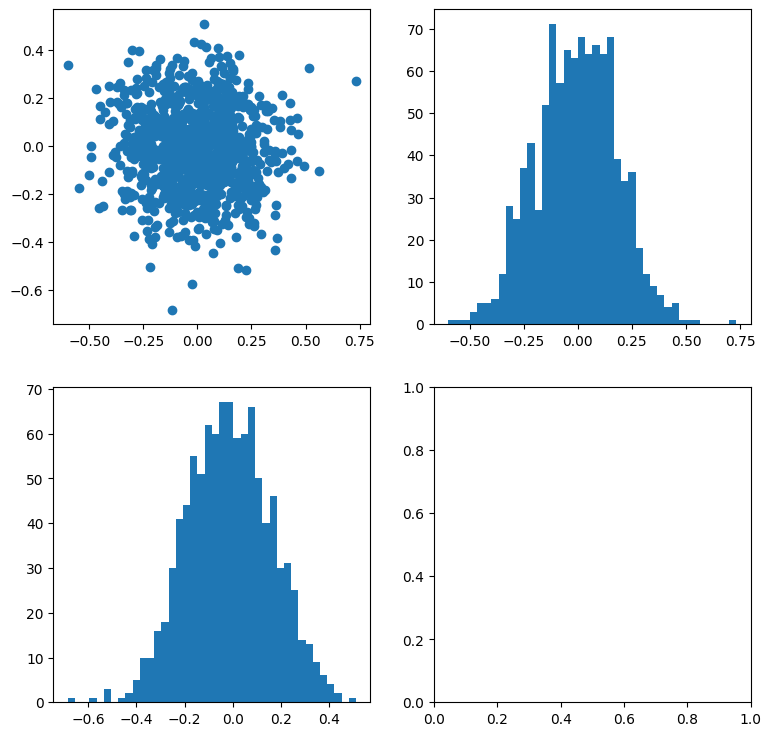

In [7]:
scatter_plot(pos[1])

array([[0.2496401 , 0.24052917],
       [0.19256648, 0.18251789],
       [0.13197314, 0.12563031],
       [0.10571066, 0.10283462]])

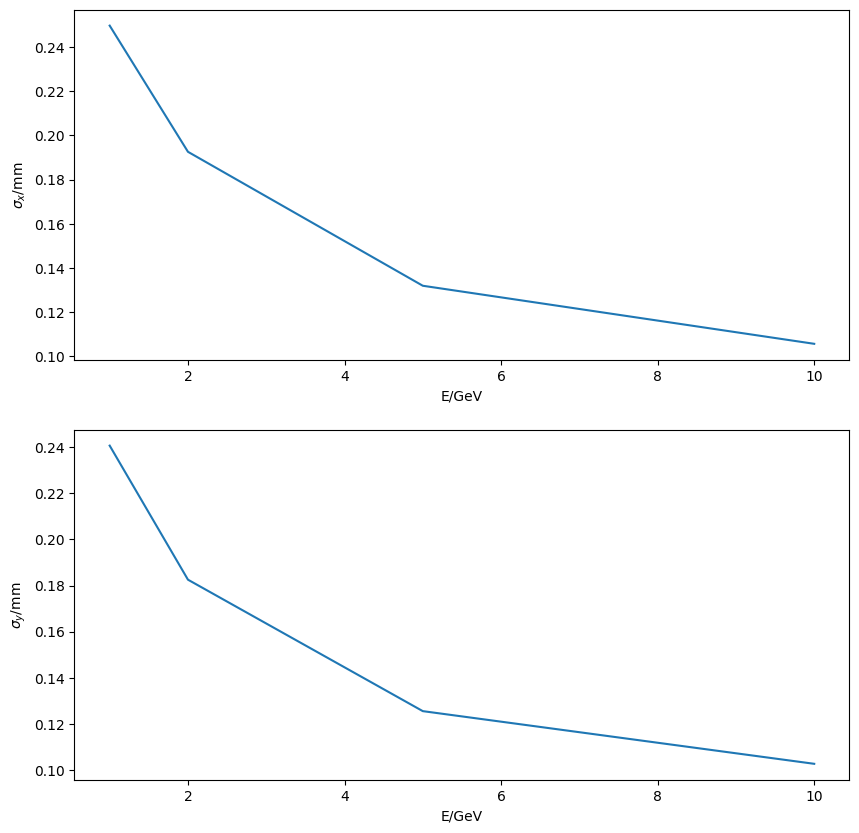

In [8]:
idx = 0
fig, axs = plt.subplots(2,1,figsize=(10,10))
axs[0].plot(Energy, sigma[:,0])
axs[1].plot(Energy, sigma[:,1])
axs[0].set_xlabel('E/GeV')
axs[1].set_xlabel('E/GeV')
axs[0].set_ylabel('$\\sigma_x$/mm')
axs[1].set_ylabel('$\\sigma_y$/mm')

sigma